# Question 1 :
### Décrivez un pipeline de détection de langage abusif sur un réseau social. Vous pouvez utiliser des schémas.(votre réponse ne doit pas dépasser une page).

Comme tout pipeline NLP, la détection de langage abusif commence par l'acquisition des données (Data acquisition). Cela peut se faire de deux manières. 

#### Scraper les données sur le réseau social

#### Avoir accès à la base de donnée du réseau social

Une fois que nous avons les données brutes, la prochaine étape consiste à traiter les données (Data Pré-Processing). La manière de traiter les données dépend de la source des données et de la qualité des données. C'est l'une des étapes la plus importante. Car un mauvais traitement des données fait ressortir en output un mauvais corpus qui pourra biaiser le résultat du modèle final.

Différentes techniques sont utilisées pour mener à bien cette étape, en commençant par mettre les données en minuscule pour les textes jusqu'à faire du part of speech en passant par la tokenisation (toutes les différentes étapes sont décrites sur l'image). 

Après le traitement des données vient l'étape de l'extraction des données (caractères) pour former un dataset. Il s'agit de la représentation matricielle/vectorielle de nos données en passant du texte au chiffre compressible par le modèle. Ici également il y a différentes techniques de représentation des données (3 principalement sont mieux adaptées) voir l'image.

Une fois que l'extraction des caractères est effectuée et le dataset formé, l'étape suivante est la création du modèle de classification binaire (0 ou 1) qui permettra de reconnaitre le contenu.

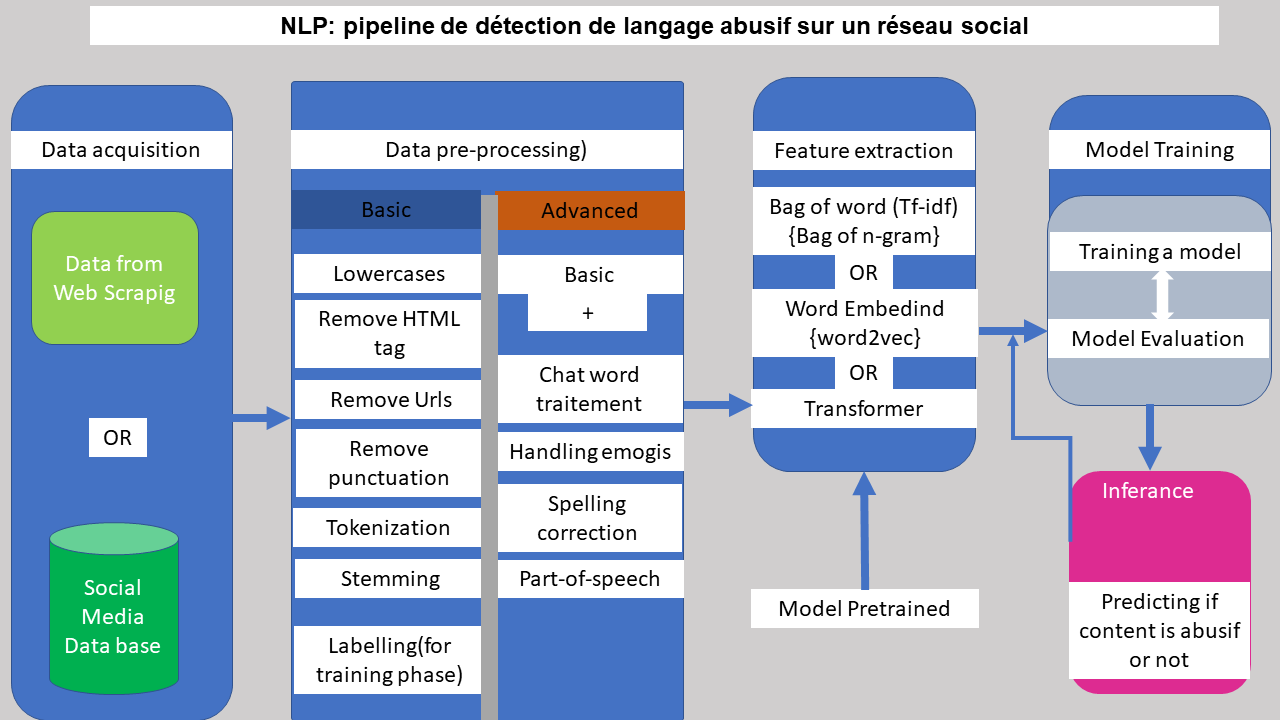

# Question 2 :
### Expliquez le processus permettant d’utiliser un algorithme hybride CNN-LSTM pour détecter un contenu agressif dans une publication.

CNN : est un algorithme qui utilise les couches de convolution, les pooling et les fonctions d'activation successives pour extraire les caractères de la donnée d'entrée (réduire la taille de l'entrée) ainsi faciliter l'apprentissage, car en output ont ne trouve que les caractères importants. Cependant, cet algorithme ne dispose pas de la mémoire, ce qui l'empêche de traiter les données récurrentes et de déterminer le contexte.

LSTM : Contrairement à CNN, LSTM dispose des connexions de rétroaction, ce qui lui offre la capacité de traiter les données récurrentes. (t, t-n, t+n)

La détection des termes agressifs contenus dans une publication donnée est complexe du fait du vocabulaire varié et des contextes différents. Il faut donc l'utilisation d'une méthode qui diminue la complexité de la tâche (des données) et facilite l'apprentissage. De ce fait, l'algorithme hybride CNN-LSTM est bien adapté.

En premier lieu, le modèle prendra en entrée les séquences de texte et leur label (si supervise learning) qui seront représentés sous forme matricielle avant d'être passé à CNN qui va être utilisé pour extraire les informations locales en utilisant des convolutions et des Pooling afin de réduire la complexité et la taille des données, ensuite les sorties du CNN seront concaténés pour former un vecteur 1d qui sera passé comme entré au LSTM, grâce à sa mémoire, ce dernier va utiliser l'historique et ces features pour déterminer le contexte du texte, par la suite, on ajoute une couche de fully connected et un  sigmoid (car binaire) pour classifier le texte.  

CNN et LSTM sont complémentaires du fait que chacun capte
informations à différentes échelles 


# Question 3 :
#### Implémentez en utilisant python3 un connecteur Facebook et/ou Instagram permettant de colleter des postes (image, texte et commentaires liés aux images) par rapport à un sujet défini, exemple « le décès du président Jacques Chirac ».
#### Il est recommandé de stocker les textes et les images dans une base MongoDB. Le but de cette question est d’évaluer la qualité de votre code source

### (La forme la plus simple pour répondre à cette question est l'utilisation de l'API facebook-sdk ou la bibliothèque facebook-scraper de python). Mais je n'ai pas opté pour cette option

In [2]:
#importation des bibliotheques necessaires
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from time import sleep
from bs4 import BeautifulSoup
from pymongo import MongoClient

Creation de la fonction chomeOpenInit que innitialise le driver de Chrome

In [1]:
def chomeOpenInit():
    option = Options()

    option.add_argument("--disable-infobars")

    option.add_argument("start-maximized")

    option.add_argument("--disable-extensions")

    option.add_experimental_option("prefs", 
    {"profile.default_content_setting_values.notifications": 2 
     }) 
    chromeNav = webdriver.Chrome(options=option)
    
    return chromeNav
    

Creation de la fonction facebookLogin pour se connecter à facebook

In [3]:
def facebookLogin():
    try:
        
        #instance du connecter retourner par la fonction chomeOpenInit
        chromeNav = chomeOpenInit()
        
        #lien du site concerné par le connecteur : facebook
        chromeNav.get("https://www.facebook.com/")
        
        #l'utilisateur doit indiquer les informations de son compte facebook
        usernameP = input("enter your facebook email :\n")
        passewordP = input("enter your facebook password :\n")

        mail = WebDriverWait(chromeNav, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='email']")))
        password = WebDriverWait(chromeNav, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='pass']")))

        #vide et saisi dans le champs mail
        mail.clear()
        mail.send_keys(usernameP)

        #vide et saisi dans le champs passeword
        password.clear()
        password.send_keys(passewordP)
        
        #soumettre le formulatre de connexion
        submit = WebDriverWait(chromeNav, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()
    except:
        print("login password erreur : ")
        #appel fonction recurente
        facebookLogin()
        
    #la fonction retourner une instance de chromeDriver    
    return chromeNav

creation de la fonction recherche qui prendra en parametre le sujet à rechercher

In [23]:
def postsSearch(topic):
    publication = []
    chromeNav = facebookLogin()

    serachPost = WebDriverWait(chromeNav, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[type='search']"))).send_keys(Keys.ENTER)

    # recherche du topic en filtrant les recherches sur les publications    
    chromeNav.get("https://www.facebook.com/search/posts/?q="+topic)
    sleep(5)
    
    #utilisation de la bibliotheque beautifulSoup pour parser la page retourné en html
    bsoup = BeautifulSoup(chromeNav.page_source,'html.parser')
    
    # enregistrer toutes les publication disponible
    all_postf = bsoup.find_all("div",{"class":"x1yztbdb x1n2onr6 xh8yej3 x1ja2u2z"})
    
    sleep(5)
    
    for post in all_postf:
        pub ={}
     
        texte = post.find("span",{"class":"x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen xo1l8bm xzsf02u x1yc453h"}).text
        try:
            postimageLink = post.find("a",{'class':"x1i10hfl x1qjc9v5 xjbqb8w xjqpnuy xa49m3k xqeqjp1 x2hbi6w x13fuv20 xu3j5b3 x1q0q8m5 x26u7qi x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xdl72j9 x2lah0s xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x2lwn1j xeuugli xexx8yu x4uap5 x18d9i69 xkhd6sd x1n2onr6 x16tdsg8 x1hl2dhg xggy1nq x1ja2u2z x1t137rt x1o1ewxj x3x9cwd x1e5q0jg x13rtm0m x1q0g3np x87ps6o x1lku1pv x1a2a7pz x1lliihq x1pdlv7q"}).get("href")
            chromeNav.get(postimageLink)
            
            #utilisation de beatiful pour parcer la nouvelle page de l'annance afin d'extraire l'image et les commentaire
            bsoupPhoto = BeautifulSoup(chromeNav.page_source,'html.parser')
            postPhoto = bsoupPhoto.find("div",{'class':"x6s0dn4 x78zum5 xdt5ytf xl56j7k x1n2onr6"})
                   
        except:
            imageNav ="page d'image pour l'annonce"
        
        #l'obtention du lien de l'image
        imageNav = postPhoto.find('img',{'class':"x85a59c x193iq5w x4fas0m x19kjcj4"}).get("src")
        
        pub['texte'] = texte
        #les images ne sont pas sauvegarder sur le PC mais on les acces depuis facebook 
        pub['imgae'] = imageNav
        
        publication.append(pub)

    # la fonction retourner les postes ainsi que le Chrome Drive
    return publication


In [24]:
# appel de la fonction pour rechercher un sujet specifique

all_postf = postsSearch("deces president chirac image")

In [25]:
all_postf

[{'texte': 'Le décès du Président Jacques Chirac nous bouleverse tous. Son incroyable capacité d’empathie, sa proximité naturelle avec celles et ceux qui croisaient sa route ont laissé dans la mémoire de chaque ville et chaque village de France une image ou l’un de ces mots dont il avait le secret.Son amour de la France, au service de laquelle il a consacré toute sa vie, nous restera à jamais en héritage.… Voir plus',
  'imgae': 'https://scontent.ftun9-1.fna.fbcdn.net/v/t1.6435-9/71197580_2412922218744528_5165005177702318080_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=8bfeb9&_nc_ohc=TfW2gXkbZkYAX8pR9RP&_nc_ht=scontent.ftun9-1.fna&oh=00_AfAeE7SqdisKtdzrpG_bv0U97qvpC_ocqRzpGxzCxaCSOA&oe=64043263'},
 {'texte': 'Décès de Jacques Chirac Asalfo sur son compte Instagram a posté une image du groupe (Magic Système) en compagnie du Président Jacques Chirac.RIP Président Chirac',
  'imgae': 'https://scontent.ftun9-1.fna.fbcdn.net/v/t1.6435-9/71863669_10157590750217480_8396861325120110592_n.jpg?_nc_cat=103&

### stockage du textes et des images dans une base MongoDB

In [50]:
class MongoDb(object):
    def __init__(self, dbName=None, collectionName=None):
        self.dbName=dbName
        self.collectionName=collectionName
        self.client = MongoClient("localhost",27017, maxPoolSize=50)
        
        self.DB = self.client[self.dbName]
        self.collection=self.DB[self.collectionName]
        
    #fonction pour sauvegarder les données    
    def saveData(self,data):
        self.collection.insert_many(data)
        
    # fonction pour selection les données    
    def selectData(self):
        return self.collection.find()
 
      

In [51]:
mongodb = MongoDb(dbName="techniqueTest", collectionName="facebookPost")

mongodb.saveData(all_postf)

In [63]:
result = mongodb.selectData()

In [64]:
for data in result:
    print (data)
    print("==============================================================")

{'_id': ObjectId('63dcc4e63f049c227cdb33db'), 'texte': 'Le décès du Président Jacques Chirac nous bouleverse tous. Son incroyable capacité d’empathie, sa proximité naturelle avec celles et ceux qui croisaient sa route ont laissé dans la mémoire de chaque ville et chaque village de France une image ou l’un de ces mots dont il avait le secret.Son amour de la France, au service de laquelle il a consacré toute sa vie, nous restera à jamais en héritage.… Voir plus', 'imgae': 'https://scontent.ftun9-1.fna.fbcdn.net/v/t1.6435-9/71197580_2412922218744528_5165005177702318080_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=8bfeb9&_nc_ohc=TfW2gXkbZkYAX8pR9RP&_nc_ht=scontent.ftun9-1.fna&oh=00_AfAeE7SqdisKtdzrpG_bv0U97qvpC_ocqRzpGxzCxaCSOA&oe=64043263'}
{'_id': ObjectId('63dcc4e63f049c227cdb33dc'), 'texte': 'Décès de Jacques Chirac Asalfo sur son compte Instagram a posté une image du groupe (Magic Système) en compagnie du Président Jacques Chirac.RIP Président Chirac', 'imgae': 'https://scontent.ftun9-1.fna.fbcd

In [ ]:
            plus_commentaire = driver.find_element(By.CSS_SELECTOR, ".x1i10hfl.xjbqb8w.xjqpnuy.xa49m3k.xqeqjp1.x2hbi6w.x13fuv20.xu3j5b3.x1q0q8m5.x26u7qi.x972fbf.xcfux6l.x1qhh985.xm0m39n.x9f619.x1ypdohk.xdl72j9.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.x2lwn1j.xeuugli.xexx8yu.x18d9i69.xkhd6sd.x1n2onr6.x16tdsg8.x1hl2dhg.xggy1nq.x1ja2u2z.x1t137rt.x1o1ewxj.x3x9cwd.x1e5q0jg.x13rtm0m.x3nfvp2.x1q0g3np.x87ps6o.x1a2a7pz.x6s0dn4.xi81zsa.x1iyjqo2.xs83m0k.xsyo7zv.xt0b8zv").click()


# j'ai travaillé sur un notebook pour des raisons de rapidité. sinon, avec un IDE, tout le code devrait etre organisé sous forme de module et de class

In [ ]:
affiche_post = driver.find_elements(By.CSS_SELECTOR, ".x1i10hfl.xjbqb8w.xjqpnuy.xa49m3k.xqeqjp1.x2hbi6w.x13fuv20.xu3j5b3.x1q0q8m5.x26u7qi.x972fbf.xcfux6l.x1qhh985.xm0m39n.x9f619.x1ypdohk.xdl72j9.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.x2lwn1j.xeuugli.xexx8yu.x18d9i69.xkhd6sd.x1n2onr6.x16tdsg8.x1hl2dhg.xggy1nq.x1ja2u2z.x1t137rt.x1o1ewxj.x3x9cwd.x1e5q0jg.x13rtm0m.x3nfvp2.x1q0g3np.x87ps6o.x1a2a7pz.x6s0dn4.xi81zsa.x1iyjqo2.xs83m0k.xsyo7zv.xt0b8zv")


for post in affiche_post[premier_charger:]:
                

                driver.execute_script("arguments[0].click();", post)
                sleep(3)
                
                plus_commentaire = driver.find_element(By.CSS_SELECTOR, ".x1i10hfl.xjbqb8w.xjqpnuy.xa49m3k.xqeqjp1.x2hbi6w.x13fuv20.xu3j5b3.x1q0q8m5.x26u7qi.x972fbf.xcfux6l.x1qhh985.xm0m39n.x9f619.x1ypdohk.xdl72j9.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.x2lwn1j.xeuugli.xexx8yu.x18d9i69.xkhd6sd.x1n2onr6.x16tdsg8.x1hl2dhg.xggy1nq.x1ja2u2z.x1t137rt.x1o1ewxj.x3x9cwd.x1e5q0jg.x13rtm0m.x3nfvp2.x1q0g3np.x87ps6o.x1a2a7pz.x6s0dn4.xi81zsa.x1iyjqo2.xs83m0k.xsyo7zv.xt0b8zv")
                sleep(5)
                
                try:
                
                    titres = driver.find_elements(By.CSS_SELECTOR, ".x1iorvi4.x1pi30zi.x1swvt13.x1l90r2v")
                    commentaires = driver.find_elements(By.CSS_SELECTOR, ".x1iorvi4.x1pi30zi.x1swvt13.x1l90r2v")
                    titre = titres[precedent_post].text
                    print(titre)
                    precedent_post = precedent_post + 1 
                except:
                    print("pas de titre")
                    precedent_post = precedent_post + 1 
            
                    
                
                
                fermer_publication = driver.find_element(By.CSS_SELECTOR, ".x1i10hfl.x6umtig.x1b1mbwd.xaqea5y.xav7gou.x1ypdohk.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.x16tdsg8.x1hl2dhg.xggy1nq.x87ps6o.x1lku1pv.x1a2a7pz.x6s0dn4.x14yjl9h.xudhj91.x18nykt9.xww2gxu.x972fbf.xcfux6l.x1qhh985.xm0m39n.x9f619.x78zum5.xl56j7k.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x1n2onr6.xc9qbxq.x14qfxbe.x1qhmfi1")
                
                driver.execute_script("arguments[0].click();", fermer_publication) 